# Chapter 7: Image Classification with Torchvision

In [ ]:
!pip install transformers evaluate split-folders

In [ ]:
!wget https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/helper_functions.py

In [3]:
from helper_functions import get_image_from_url, show

## 7.3 Torchvision

### 7.3.4 A More Concrete Dataset

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step1.png)

#### 7.3.4.1 Preparing the Dataset

In [ ]:
!wget https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/5y9wdsg2zt-2.zip
!unzip 5y9wdsg2zt-2.zip
!unrar x 'Concrete Crack Images for Classification.rar'
!mkdir concrete && mv ./Negative ./concrete && mv ./Positive ./concrete

In [ ]:
import splitfolders
splitfolders.ratio("concrete",
                   output="concrete_dataset",
                   seed=1337,
                   ratio=(.8, .1, .1),
                   group_prefix=None,
                   move=True)

#### 7.3.4.2 Already Prepared Dataset

In [ ]:
!wget https://github.com/dvgodoy/assets/releases/download/dataset/concrete.tar.gz
!tar -xvzf concrete.tar.gz && mv dataset/ concrete_dataset/

### 7.3.5 I/O and Utilities

In [7]:
from torchvision.io import read_image

train_folder = './concrete_dataset/train'
filepath = f'{train_folder}/Positive/00001.jpg'
image_tensor = read_image(filepath)
image_tensor, image_tensor.shape

(tensor([[[130, 131, 134,  ..., 138, 138, 138],
          [132, 133, 134,  ..., 138, 138, 138],
          [136, 135, 135,  ..., 138, 138, 138],
          ...,
          [137, 138, 138,  ..., 139, 139, 139],
          [137, 138, 138,  ..., 139, 139, 139],
          [137, 138, 138,  ..., 139, 139, 139]],
 
         [[134, 135, 138,  ..., 140, 140, 140],
          [136, 137, 138,  ..., 140, 140, 140],
          [140, 139, 139,  ..., 140, 140, 140],
          ...,
          [138, 139, 139,  ..., 141, 141, 141],
          [138, 139, 139,  ..., 141, 141, 141],
          [138, 139, 139,  ..., 141, 141, 141]],
 
         [[135, 136, 139,  ..., 139, 139, 139],
          [137, 138, 139,  ..., 139, 139, 139],
          [141, 140, 140,  ..., 139, 139, 139],
          ...,
          [140, 141, 141,  ..., 140, 140, 140],
          [140, 141, 141,  ..., 140, 140, 140],
          [140, 141, 141,  ..., 140, 140, 140]]], dtype=torch.uint8),
 torch.Size([3, 227, 227]))

In [8]:
import os
from torchvision.utils import make_grid

fnames = os.listdir(f'{train_folder}/Positive')[:8]
images = [read_image(f'{train_folder}/Positive/{fname}') for fname in fnames]
image_grid = make_grid(images, nrow=4)
image_grid, image_grid.shape

(tensor([[[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0, 133,  ..., 159,   0,   0],
          ...,
          [  0,   0, 193,  ..., 170,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]],
 
         [[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0, 130,  ..., 155,   0,   0],
          ...,
          [  0,   0, 181,  ..., 167,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]],
 
         [[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0, 123,  ..., 154,   0,   0],
          ...,
          [  0,   0, 165,  ..., 162,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]], dtype=torch.uint8),
 torch.Size([3, 460, 918]))

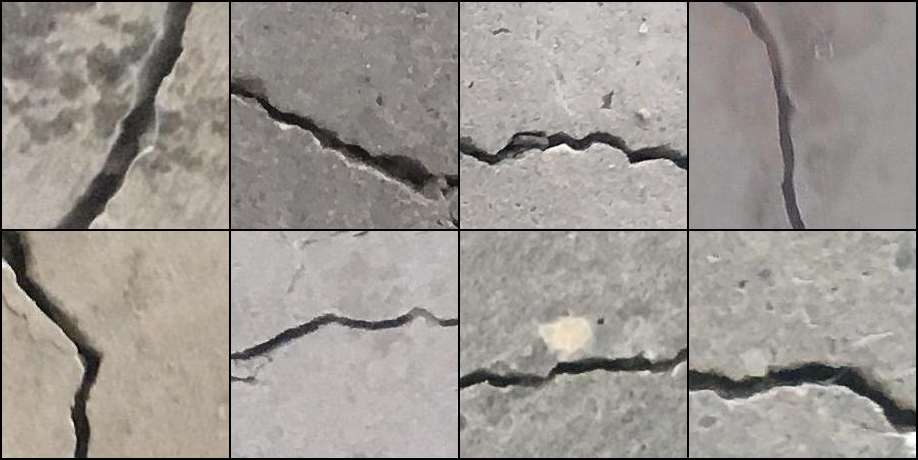

In [9]:
from torchvision.io import write_png
from PIL import Image

write_png(image_grid, 'positive_grid.png')
Image.open('positive_grid.png')

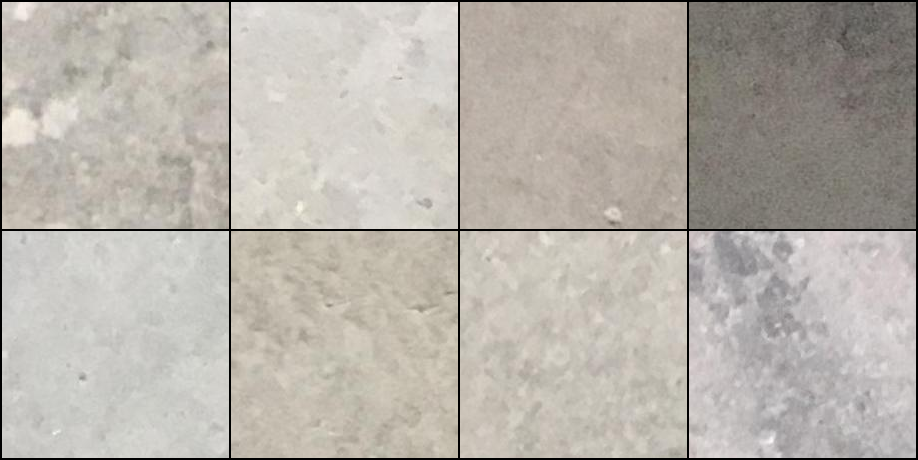

In [10]:
fnames = os.listdir(f'{train_folder}/Negative')[:8]
images = [read_image(f'{train_folder}/Negative/{fname}') for fname in fnames]
image_grid = make_grid(images, nrow=4)
write_png(image_grid, 'negative_grid.png')
Image.open('negative_grid.png')

## 7.4 Pretrained Models as Feature Extractors

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch7/features1.png)
Source: [“Unsupervised Learning of Hierarchical Representations with Convolutional Deep Belief Networks”](https://web.eecs.umich.edu/~honglak/icml09-ConvolutionalDeepBeliefNetworks.pdf) by Honglak Lee and colleagues (2011)

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch7/features2.png)
Source: [“Unsupervised Learning of Hierarchical Representations with Convolutional Deep Belief Networks”](https://web.eecs.umich.edu/~honglak/icml09-ConvolutionalDeepBeliefNetworks.pdf) by Honglak Lee and colleagues (2011)

### 7.4.1 Feature Extractor

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step3.png)

In [11]:
import torch
from torchvision.models import get_weight

repo = 'pytorch/vision'
weights = get_weight('ResNet18_Weights.DEFAULT')
model = torch.hub.load(repo, 'resnet18', weights=weights)
model

Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 129MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
from torchvision.models.feature_extraction import get_graph_node_names

# layers in order of execution - train and eval modes
train_nodes, eval_nodes = get_graph_node_names(model)
train_nodes

['x',
 'conv1',
 'bn1',
 'relu',
 'maxpool',
 'layer1.0.conv1',
 'layer1.0.bn1',
 'layer1.0.relu',
 'layer1.0.conv2',
 'layer1.0.bn2',
 'layer1.0.add',
 'layer1.0.relu_1',
 'layer1.1.conv1',
 'layer1.1.bn1',
 'layer1.1.relu',
 'layer1.1.conv2',
 'layer1.1.bn2',
 'layer1.1.add',
 'layer1.1.relu_1',
 'layer2.0.conv1',
 'layer2.0.bn1',
 'layer2.0.relu',
 'layer2.0.conv2',
 'layer2.0.bn2',
 'layer2.0.downsample.0',
 'layer2.0.downsample.1',
 'layer2.0.add',
 'layer2.0.relu_1',
 'layer2.1.conv1',
 'layer2.1.bn1',
 'layer2.1.relu',
 'layer2.1.conv2',
 'layer2.1.bn2',
 'layer2.1.add',
 'layer2.1.relu_1',
 'layer3.0.conv1',
 'layer3.0.bn1',
 'layer3.0.relu',
 'layer3.0.conv2',
 'layer3.0.bn2',
 'layer3.0.downsample.0',
 'layer3.0.downsample.1',
 'layer3.0.add',
 'layer3.0.relu_1',
 'layer3.1.conv1',
 'layer3.1.bn1',
 'layer3.1.relu',
 'layer3.1.conv2',
 'layer3.1.bn2',
 'layer3.1.add',
 'layer3.1.relu_1',
 'layer4.0.conv1',
 'layer4.0.bn1',
 'layer4.0.relu',
 'layer4.0.conv2',
 'layer4.0.bn2',

In [13]:
return_nodes = {
    'flatten': 'features',
}

In [14]:
from torchvision.models.feature_extraction import create_feature_extractor

headless_model = create_feature_extractor(model, return_nodes=return_nodes)
headless_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Module(
    (0): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2):

In [15]:
activations = headless_model(torch.randn(1, 3, 224, 224))
type(activations), activations.keys()

(dict, dict_keys(['features']))

In [16]:
activations['features'].shape

torch.Size([1, 512])

### 7.4.2 Preprocessed Dataset

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step4.png)

In [17]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms as T

weights = get_weight('ResNet18_Weights.DEFAULT')
transforms_fn = weights.transforms()

datasets = {}
dataloaders = {}
datasets['train'] = ImageFolder(root='./concrete_dataset/train', transform=transforms_fn)
dataloaders['train'] = DataLoader(datasets['train'], batch_size=32)

In [19]:
from torch.utils.data import TensorDataset

def preprocess_dataset(model, loader, device=None, key=None):
    # If a device is not given, finds in which device the
    # model was loaded on
    if device is None:
        device = next(iter(model.parameters())).device

    features = None
    labels = None

    for i, (x, y) in enumerate(loader):
        # Sets model to evaluation mode
        model.eval()
        # Send input to the same device as the model
        x = x.to(device)
        # Makes predictions
        output = model(x)

        # If the output produced by the model is a dictionary
        # assumes the first key contains the predictions
        if isinstance(output, dict):
            if key is None:
                key = output.keys()[0]
            output = output[key]

        # If it is the first mini-batch, use the output and labels
        # as starting points
        if i == 0:
            features = output.detach().cpu()
            labels = y.cpu()
        # otherwise concatenate them with previous tensors
        else:
            features = torch.cat([features, output.detach().cpu()])
            labels = torch.cat([labels, y.cpu()])

    dataset = TensorDataset(features, labels)
    return dataset

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

headless_model.to(device)
preprocessed_datasets = {}
preprocessed_datasets['train'] = preprocess_dataset(headless_model, dataloaders['train'], device, 'features')
preprocessed_datasets['train']

In [21]:
(preprocessed_datasets['train'].tensors,
 preprocessed_datasets['train'].tensors[0].shape,
 preprocessed_datasets['train'].tensors[1].shape)

((tensor([[0.0227, 0.0891, 0.0017,  ..., 0.0042, 0.0142, 0.1939],
          [0.1045, 0.0337, 0.0300,  ..., 0.0000, 0.0000, 0.0324],
          [0.1127, 0.1702, 0.1946,  ..., 0.5687, 0.4084, 0.0465],
          ...,
          [0.6585, 0.8275, 0.6698,  ..., 0.2021, 0.8161, 0.0074],
          [0.0410, 1.0510, 0.0621,  ..., 0.2737, 1.1039, 0.5036],
          [0.1797, 0.1010, 0.0596,  ..., 0.4915, 1.5862, 0.0985]]),
  tensor([0, 0, 0,  ..., 1, 1, 1])),
 torch.Size([32000, 512]),
 torch.Size([32000]))

In [22]:
for split in ['val', 'test']:
    datasets[split] = ImageFolder(root=f'./concrete_dataset/{split}', transform=transforms_fn)
    dataloaders[split] = DataLoader(datasets[split], batch_size=32)
    preprocessed_datasets[split] = preprocess_dataset(headless_model, dataloaders[split], device, 'features')

In [23]:
tensors_only = {split: preprocessed_datasets[split].tensors for split in ['train', 'val', 'test']}
tensors_only

{'train': (tensor([[0.0227, 0.0891, 0.0017,  ..., 0.0042, 0.0142, 0.1939],
          [0.1045, 0.0337, 0.0300,  ..., 0.0000, 0.0000, 0.0324],
          [0.1127, 0.1702, 0.1946,  ..., 0.5687, 0.4084, 0.0465],
          ...,
          [0.6585, 0.8275, 0.6698,  ..., 0.2021, 0.8161, 0.0074],
          [0.0410, 1.0510, 0.0621,  ..., 0.2737, 1.1039, 0.5036],
          [0.1797, 0.1010, 0.0596,  ..., 0.4915, 1.5862, 0.0985]]),
  tensor([0, 0, 0,  ..., 1, 1, 1])),
 'val': (tensor([[0.0000e+00, 4.8005e-02, 5.7792e-04,  ..., 2.0283e-03, 1.4154e-03,
           2.1872e-05],
          [2.9983e-03, 1.6763e-01, 2.0757e-02,  ..., 0.0000e+00, 0.0000e+00,
           3.8599e-03],
          [1.0488e-01, 7.6243e-02, 1.9473e-01,  ..., 5.9086e-01, 0.0000e+00,
           1.3055e-02],
          ...,
          [3.2929e-01, 1.0850e+00, 1.7993e+00,  ..., 3.2725e-01, 8.4750e-01,
           1.5091e+00],
          [1.6172e-01, 4.4449e-01, 5.7581e-01,  ..., 7.7741e-02, 1.1706e+00,
           1.4460e-01],
          [1.3

In [24]:
torch.save(tensors_only, 'concrete_preprocessed.pth')

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step5.png)

In [25]:
preprocessed_dataloaders = {}
for split in ['train', 'val', 'test']:
    preprocessed_dataloaders[split] = DataLoader(preprocessed_datasets[split], batch_size=32, shuffle=(split == 'train'))

### 7.4.3 Training a Classifier Head

In [26]:
import numpy as np
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, solver='newton-cholesky') # n_samples >> n_features
X_train = tensors_only['train'][0].numpy()
y_train = tensors_only['train'][1].numpy()
clf.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='newton-cholesky')

In [27]:
X_val = tensors_only['val'][0].numpy()
y_val = tensors_only['val'][1].numpy()

(clf.predict(X_val) == y_val).sum() / X_val.shape[0]

0.9985

In [28]:
wrong_idx = np.where(clf.predict(X_val) != y_val)[0]
wrong_idx

array([ 221, 1064, 1495, 1497, 3075, 3422])

In [29]:
wrong_images = np.array(datasets['val'].imgs)[wrong_idx]
wrong_images

array([['./concrete_dataset/val/Negative/02432.jpg', '0'],
       ['./concrete_dataset/val/Negative/10685.jpg', '0'],
       ['./concrete_dataset/val/Negative/15100.jpg', '0'],
       ['./concrete_dataset/val/Negative/15142.jpg', '0'],
       ['./concrete_dataset/val/Positive/10796_1.jpg', '1'],
       ['./concrete_dataset/val/Positive/14427_1.jpg', '1']], dtype='<U43')

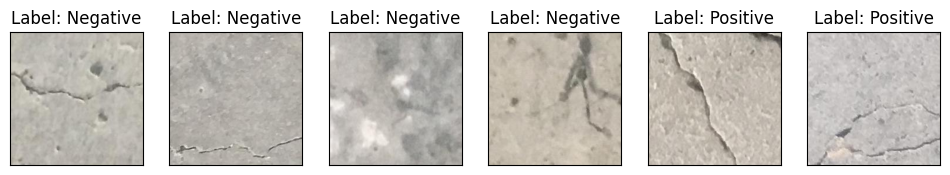

In [30]:
fig = show([Image.open(img) for img in wrong_images[:, 0]], [f'Label: {"Positive" if int(l) else "Negative"}' for l in wrong_images[:, 1]])
fig.set_size_inches(12, 8)

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step1.png)

In [31]:
import torch.optim as optim
import torch.nn as nn

torch.manual_seed(42)

head = nn.Linear(512, 1)

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step2.png)

In [32]:
loss_fn = nn.BCEWithLogitsLoss()

In [33]:
batch_features, batch_targets = preprocessed_datasets['train'][:8]
batch_targets

tensor([0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
bad_predictions = head(batch_features)
bad_predictions

tensor([[-0.5276],
        [-0.3818],
        [-0.4256],
        [-0.6324],
        [-0.4481],
        [-0.5714],
        [-0.2978],
        [-0.3851]], grad_fn=<AddmmBackward0>)

In [35]:
loss_fn(bad_predictions, batch_targets)

ValueError: ignored

In [36]:
batch_targets = batch_targets.unsqueeze(1)
batch_targets

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])

In [37]:
loss_fn(bad_predictions, batch_targets)

RuntimeError: ignored

In [38]:
loss_fn(bad_predictions, batch_targets.float())

tensor(0.4911, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step3.png)

In [39]:
# Suggested learning rate
lr = 3e-4

optimizer = optim.Adam(head.parameters(), lr=lr)

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step4.png)

In [40]:
from tqdm import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'

head.to(device)

batch_losses = []

## Training
for i, (batch_features, batch_targets) in tqdm(enumerate(preprocessed_dataloaders['train'])):
    model.train()

    batch_features = batch_features.to(device)
    batch_targets = batch_targets.unsqueeze(1).float().to(device)

    # Step 1 - forward pass
    predictions = head(batch_features)

    # Step 2 - computing the loss
    loss = loss_fn(predictions, batch_targets)

    # Step 3 - computing the gradients
    loss.backward()
    batch_losses.append(loss.item())

    # Step 4 - updating parameters and zeroing gradients
    optimizer.step()
    optimizer.zero_grad()

1000it [00:01, 600.41it/s]


### 7.4.4 Evaluation Metrics

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step5.png)

#### 7.4.4.4 Classification Threshold

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch7/one_logit.png)

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch7/sigmoid.png)

In [41]:
threshold = 0.5
probability = torch.sigmoid(predictions)
pred_class = probability > threshold

In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(batch_targets.tolist(), pred_class.tolist())

array([[16,  0],
       [ 0, 16]])

In [50]:
new_threshold = 0.95
pred_class = probability > new_threshold

confusion_matrix(batch_targets.tolist(), pred_class.tolist())

array([[16,  0],
       [ 1, 15]])

#### 7.4.4.5 Evaluate

In [53]:
import evaluate

metrics = evaluate.combine(["accuracy", "precision", "recall"])

In [56]:
head.eval()

for features, targets in preprocessed_dataloaders['val']:
    pred = head(features.to(device))
    probability = torch.sigmoid(pred).squeeze()
    threshold = 0.5
    pred_class = (probability > threshold).int()
    metrics.add_batch(references=targets.tolist(), predictions=pred_class.tolist())

In [57]:
metrics.compute()

{'accuracy': 0.9925, 'precision': 0.9934869739478958, 'recall': 0.9915}

### 7.4.5 Reattaching the Head

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step1.png)

In [58]:
weights = get_weight('ResNet18_Weights.DEFAULT')
transforms_fn = weights.transforms()

repo = 'pytorch/vision'
model = torch.hub.load(repo, 'resnet18', weights=weights)
model.fc = head
model.to(device)

Using cache found in /root/.cache/torch/hub/pytorch_vision_main


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step5.png)

In [69]:
def predict(path_or_url, model, transforms_fn, categories, topk=1, headers=None):
    if path_or_url.startswith('http'):
        img = get_image_from_url(path_or_url, headers=headers)
    else:
        img = Image.open(path_or_url)

    # Preprocesses the image using the transforms_fn
    preproc_img = transforms_fn(img)
    # If there are only three dimensions (CHW), unsqueeze the first
    # to get a mini-batch of one (NCHW)
    if len(preproc_img.shape) == 3:
        preproc_img = preproc_img.unsqueeze(0)

    # Never forget to set the model to evaluation mode!
    model.eval()
    # We find in which device the model is loaded on
    # and send the preprocessed image to the same device
    # to get predictions from the model
    device = next(iter(model.parameters())).device
    pred = model(preproc_img.to(device))

    # If the output is a dictionary, extract logits from it
    if isinstance(pred, dict):
        pred = pred['logits']

    # Binary classification
    is_binary = (pred.shape[1] == 1)
    if is_binary:
        # Uses sigmoid function to convert predicted logits into probabilities
        probability = torch.sigmoid(pred).squeeze()
        # In binary classification, we need to use a threshold to determine if
        # it is a positive or a negative class
        threshold = 0.5
        pred_class = probability > threshold
        values = (1-probability) if (probability <= threshold) else probability
        return [{'label': categories[pred_class], 'value': values.tolist()}]
    # Multi-class classification
    else:
        # Uses softmax function to convert predicted logits into probabilities
        probabilities = torch.nn.functional.softmax(pred[0], dim=0)
        # In multi-class classification, we may take the top-k results only
        values, indices = torch.topk(probabilities, topk)
        return [{'label': categories[i], 'value': v.item()} for i, v in zip(indices, values)]

In [ ]:
!wget https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch7/cracked_drywall.jpg

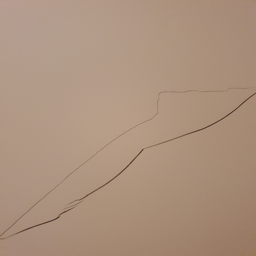

In [65]:
Image.open('./cracked_drywall.jpg').resize((256, 256))

In [70]:
predict('./cracked_drywall.jpg', model, transforms_fn, ['Negative', 'Positive'])

[{'label': 'Positive', 'value': 0.999718964099884}]